### Exercise 7
[editted]

Finish the following four tasks. Submit a jupyter notebook with your code and the plots. 

Before you start: Download Boston’s crime incident reports for the year 2019, and 2020 here (Links to an external site.). 

According to National Institute of Justice, violent crimes and property crimes include the following offense types respectively:

Violent crimes: robbery, assault, rape
Property crimes: burglary, larceny, theft, auto theft, arson

## Task 7.1 

Combine year 2019 and year 2020’s crime records into one pandas dataframe. Drop duplicates as well as any record that has missing values in the following columns: “INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. Save the “cleaned” pandas dataframe to a separate csv file. Use the "OFFENSE_DESCRIPTION" column to identify violent vs. property crime incidents, and based on the cleaned dataframe, count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively. Print the results. Do you see any trend? 



In [95]:
## change working directory to the crime data folder
import os

os.chdir('/Volumes/GoogleDrive/My Drive/2022 Computational Sociology/compsoc')

import pandas as pd
crime_2019_df = pd.read_csv('boston_crime_2019.csv')
crime_2020_df = pd.read_csv('boston_crime_2020.csv')

crime_df = pd.concat([crime_2019_df, crime_2020_df])

nona_df = crime_df.dropna(subset = ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 
                             'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])

nodupna_df = nona_df.drop_duplicates()
nodupna_df.to_csv('cleaned_crime.csv', index=False)

/var/folders/jr/s98kbnrj46v8wnrwc4xscn5c0000gn/T/ipykernel_79845/1139141910.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_2019_df = pd.read_csv('boston_crime_2019.csv')
/var/folders/jr/s98kbnrj46v8wnrwc4xscn5c0000gn/T/ipykernel_79845/1139141910.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_2020_df = pd.read_csv('boston_crime_2020.csv')


In [96]:
crime_df = pd.read_csv('cleaned_crime.csv')

/var/folders/jr/s98kbnrj46v8wnrwc4xscn5c0000gn/T/ipykernel_79845/408813043.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('cleaned_crime.csv')


In [97]:
crime_df['offense_type'] = None
crime_df['offense_type'][crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
crime_df['offense_type'][crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'

describe_by_offense = crime_df.groupby(['offense_type', 'YEAR', 'DISTRICT']).agg({'INCIDENT_NUMBER': 'count', 'SHOOTING': 'sum'}).reset_index()

/var/folders/jr/s98kbnrj46v8wnrwc4xscn5c0000gn/T/ipykernel_79845/323654187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['offense_type'][crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
/var/folders/jr/s98kbnrj46v8wnrwc4xscn5c0000gn/T/ipykernel_79845/323654187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['offense_type'][crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'


In [98]:
describe_by_offense

,offense_type,YEAR,DISTRICT,INCIDENT_NUMBER,SHOOTING
0,property crime,2019,A1,1919,0
1,property crime,2019,A15,271,0
2,property crime,2019,A7,418,0
3,property crime,2019,B2,1418,0
4,property crime,2019,B3,1076,1
5,property crime,2019,C11,1672,1
6,property crime,2019,C6,963,0
7,property crime,2019,D14,885,0
8,property crime,2019,D4,2806,0
9,property crime,2019,E13,691,0



## Task 7.2 
Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
violent_by_district = describe_by_offense[describe_by_offense['offense_type'] == 'violent crime']
property_by_district = describe_by_offense[describe_by_offense['offense_type'] == 'property crime']

In [101]:
df= property_by_district.merge(violent_by_district, on=['YEAR', 'DISTRICT'])

In [102]:
df

,offense_type_x,YEAR,DISTRICT,INCIDENT_NUMBER_x,SHOOTING_x,offense_type_y,INCIDENT_NUMBER_y,SHOOTING_y
0,property crime,2019,A1,1919,0,violent crime,1216,3
1,property crime,2019,A15,271,0,violent crime,153,2
2,property crime,2019,A7,418,0,violent crime,333,4
3,property crime,2019,B2,1418,0,violent crime,1286,56
4,property crime,2019,B3,1076,1,violent crime,1081,46
5,property crime,2019,C11,1672,1,violent crime,1026,22
6,property crime,2019,C6,963,0,violent crime,621,8
7,property crime,2019,D14,885,0,violent crime,420,0
8,property crime,2019,D4,2806,0,violent crime,1146,7
9,property crime,2019,E13,691,0,violent crime,432,11


Text(0, 0.5, 'Violent crimes')

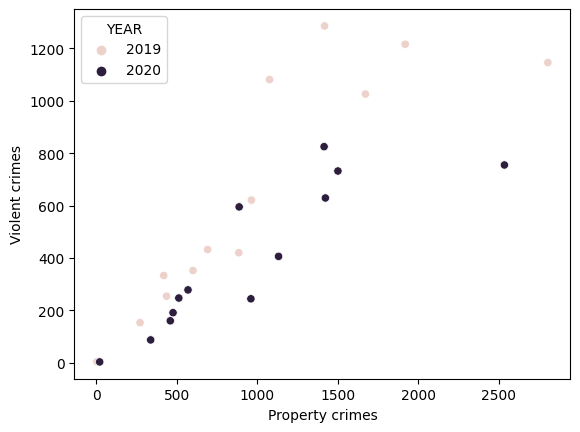

In [103]:
fig = sns.scatterplot(x='INCIDENT_NUMBER_x', y='INCIDENT_NUMBER_y', data=df, hue='YEAR')
h, l = fig.get_legend_handles_labels()
plt.xlabel("Property crimes")
plt.ylabel("Violent crimes")


## Task 7.3 
Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. X axis: districts. Y axis: annual sums. Use different bars to represent data from different years. 


Text(0, 0.5, 'Incident count')

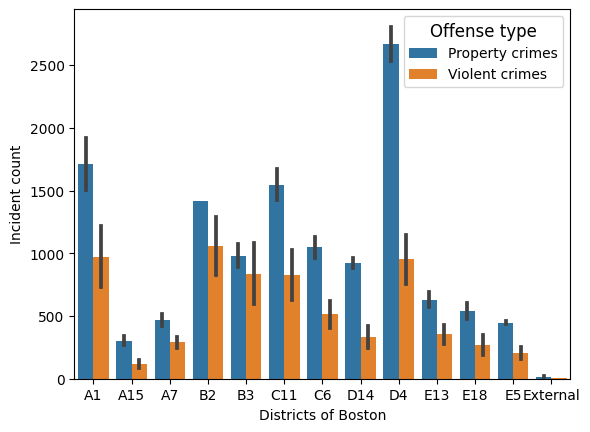

In [104]:
fig = sns.barplot(x='DISTRICT', y='INCIDENT_NUMBER', data=describe_by_offense, hue='offense_type')
h, l = fig.get_legend_handles_labels()
legend = plt.legend(h, ['Property crimes', 'Violent crimes'], title="Offense type", fontsize=10)
legend.get_title().set_fontsize('12')
plt.xlabel("Districts of Boston")
plt.ylabel("Incident count")

Some districts have much higher levels of crime than others such as D4, A1, B2, and C11. The highest level of crimes are on property. 

### Task 7.4
Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. X axis: quarters. Y axis: district-level shooting incidents (counts).

 

In [105]:
describe_by_offense_month = crime_df.groupby(['offense_type', 'MONTH', 'YEAR', 'DISTRICT']).agg({'INCIDENT_NUMBER': 'count', 'SHOOTING': 'sum'}).reset_index()

In [107]:
describe_by_offense_month['DATE'] = pd.to_datetime(describe_by_offense_month[['YEAR', 'MONTH']].assign(DAY=1))
describe_by_offense_month['quarter'] = describe_by_offense_month['DATE'].dt.to_period('Q')
describe_by_offense_month

,offense_type,MONTH,YEAR,DISTRICT,INCIDENT_NUMBER,SHOOTING,DATE
0,property crime,1,2019,A1,134,0,2019-01-01
1,property crime,1,2019,A15,13,0,2019-01-01
2,property crime,1,2019,A7,30,0,2019-01-01
3,property crime,1,2019,B2,151,0,2019-01-01
4,property crime,1,2019,B3,75,0,2019-01-01
...,...,...,...,...,...,...,...
588,violent crime,12,2020,D14,21,0,2020-12-01
589,violent crime,12,2020,D4,37,0,2020-12-01
590,violent crime,12,2020,E13,17,0,2020-12-01
591,violent crime,12,2020,E18,13,1,2020-12-01


Text(0, 0.5, 'Incident count')

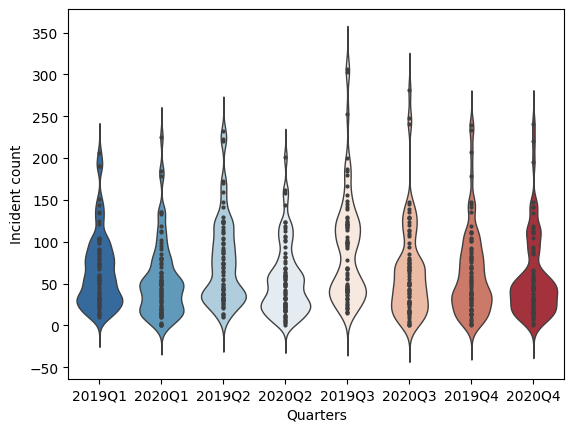

In [115]:
fig = sns.violinplot(y='INCIDENT_NUMBER', x='quarter', data=describe_by_offense_month, inner='point', palette='RdBu_r',bw=.2, cut=4, linewidth=1)
plt.xlabel("Quarters")
plt.ylabel("Incident count")
